### Section 1
###  The City of Baltimore maintains a database of parking citations issued within the city. More information about the dataset can be found [here](https://data.baltimorecity.gov/Transportation/Parking-Citations/n4ma-fj3m). You can download the dataset as a CSV file [here](https://data.baltimorecity.gov/api/views/n4ma-fj3m/rows.csv). Unless stated otherwise, you should only consider citations written before January 1, 2019.


In [68]:
import pandas as pd
import numpy as np


In [4]:
Baltimore_Parking_Data = pd.read_csv('./Dataset/Parking_Citations.csv')
Baltimore_Parking_Data.head()

/Users/my_macbook/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Citation,Tag,ExpMM,ExpYY,State,Make,Address,ViolCode,Description,ViolFine,...,Balance,PenaltyDate,OpenFine,OpenPenalty,NoticeDate,ImportDate,Neighborhood,PoliceDistrict,CouncilDistrict,Location
0,82691651,69943CF,04,19.0,MD,MAZD,1300 BLK EAST NORTHERN PKWY WB,32,Fixed Speed Camera,40.0,...,0.0,NaN,0.0,0.0,NaN,04/26/2018 04:02:00 AM,NaN,NaN,NaN,"1300 BLK EAST NORTHERN PKWY\nWB Baltimore, MD\..."
1,85937226,T720887,12,18.0,MD,ACUR,300 BLK NORTH BEND RD SB,32,Fixed Speed Camera,40.0,...,40.0,NaN,0.0,0.0,NaN,01/03/2019 04:33:00 AM,NaN,NaN,NaN,NaN
2,82691115,5BA2678,03,19.0,MD,TOYT,5000 BLK ROLAND AVE NB,32,Fixed Speed Camera,40.0,...,0.0,NaN,0.0,0.0,NaN,04/26/2018 04:02:00 AM,NaN,NaN,NaN,"5000 BLK ROLAND AVE\nNB Baltimore, MD\n(39.353..."
3,82694689,5BT8544,01,18.0,MD,FORD,2400 BLK ERDMAN AVE NB,32,Fixed Speed Camera,40.0,...,0.0,NaN,0.0,0.0,NaN,04/26/2018 04:02:00 AM,NaN,NaN,NaN,"2400 BLK ERDMAN AVE\nNB Baltimore, MD\n(39.325..."
4,82691214,1BV0537,11,18.0,MD,SUBA,1300 BLK WEST COLD SPRING LN W,32,Fixed Speed Camera,40.0,...,0.0,NaN,0.0,0.0,NaN,04/26/2018 04:02:00 AM,NaN,NaN,NaN,"1300 BLK WEST COLD SPRING LN W\nBaltimore, MD\..."


In [7]:
Baltimore_Parking_Data.count()

Citation           3374648
Tag                3374347
ExpMM              3296812
ExpYY              3374630
State              3374648
Make               3371487
Address            3374646
ViolCode           3374648
Description        3374648
ViolFine           3374648
ViolDate           3370118
Balance            3374648
PenaltyDate              0
OpenFine           3374648
OpenPenalty        3374648
NoticeDate          844802
ImportDate         3374648
Neighborhood        344547
PoliceDistrict      344547
CouncilDistrict     344572
Location           2184137
dtype: int64

In [8]:
Baltimore_Parking_Data['Citation'].nunique()

3374648

In [9]:
Baltimore_Parking_Data.isnull().sum()

Citation                 0
Tag                    301
ExpMM                77836
ExpYY                   18
State                    0
Make                  3161
Address                  2
ViolCode                 0
Description              0
ViolFine                 0
ViolDate              4530
Balance                  0
PenaltyDate        3374648
OpenFine                 0
OpenPenalty              0
NoticeDate         2529846
ImportDate               0
Neighborhood       3030101
PoliceDistrict     3030101
CouncilDistrict    3030076
Location           1190511
dtype: int64

### 1. For all citations, what is the mean violation fine?

In [15]:
mean_ViolFine = round(Baltimore_Parking_Data['ViolFine'].mean(skipna = True),9)

In [16]:
mean_ViolFine

49.893938271

### 2. Find the police district that has the highest mean violation fine. What is that mean violation fine? Keep in mind that Baltimore is divided into nine police districts, so clean the data accordingly.

In [19]:
Baltimore_Parking_Data['PoliceDistrict'].value_counts()

Southeastern    63802
Central         58229
Southern        54520
Northern        42447
Notheastern     24557
Eastern         20698
Western         17849
Southwestern    15721
Northwestern    12816
SOUTHEASTERN     8600
SOUTHERN         7083
CENTRAL          6437
NORTHERN         5419
NORTHEASTERN     1865
EASTERN          1489
SOUTHWESTERN     1150
WESTERN          1137
NORTHWESTERN      728
Name: PoliceDistrict, dtype: int64

In [21]:
Baltimore_Parking_Data['PoliceDistrict'] = Baltimore_Parking_Data['PoliceDistrict'].str.lower()

In [22]:
Baltimore_Parking_Data['PoliceDistrict'].value_counts()

southeastern    72402
central         64666
southern        61603
northern        47866
notheastern     24557
eastern         22187
western         18986
southwestern    16871
northwestern    13544
northeastern     1865
Name: PoliceDistrict, dtype: int64

### Official Districts Name (https://en.wikipedia.org/wiki/Baltimore_Police_Department)
1-Central    
2-Southeast    
3-Eastern    
4-Northeast     
5-Northern     
6-Northwest     
7-Western    
8-Southwest    
9-Southern    

In [24]:
# Replace notheastern to northeastern
Baltimore_Parking_Data['PoliceDistrict'] = Baltimore_Parking_Data['PoliceDistrict'].str.replace('notheastern','northeastern')

In [25]:
Baltimore_Parking_Data['PoliceDistrict'].value_counts()

southeastern    72402
central         64666
southern        61603
northern        47866
northeastern    26422
eastern         22187
western         18986
southwestern    16871
northwestern    13544
Name: PoliceDistrict, dtype: int64

In [26]:
BPD_District_meanVioFine = Baltimore_Parking_Data.groupby('PoliceDistrict', as_index=False)['ViolFine'].mean()

In [29]:
BPD_District_meanVioFine.rename(columns = {'ViolFine':'mean_ViolFine'},inplace = True)
BPD_District_meanVioFine.sort_values(by=['mean_ViolFine'],inplace=True,ascending=False)
BPD_District_meanVioFine

,PoliceDistrict,mean_ViolFine
2,northeastern,61.354969
4,northwestern,59.755685
7,southwestern,58.299567
6,southern,54.374121
8,western,53.474876
1,eastern,50.795736
5,southeastern,48.743529
3,northern,48.132223
0,central,44.799771


In [31]:
highest_mean_VioFine = BPD_District_meanVioFine['mean_ViolFine'].tolist()[0]
highest_mean_VioFine = round(highest_mean_VioFine,9)

In [171]:
print('the highest mean violation fine:',highest_mean_VioFine)

the highest mean violation fine: 61.354969344


### 3. First, find the total number of citations given in each year between 2004 and 2014 (inclusive). Next, using linear regression, create a function that plots the total number of citations as a function of the year. If you were to plot a line using this function, what would be the slope of that line?

In [33]:
Baltimore_Parking_Data.dtypes

Citation             int64
Tag                 object
ExpMM               object
ExpYY              float64
State               object
Make                object
Address             object
ViolCode             int64
Description         object
ViolFine           float64
ViolDate            object
Balance            float64
PenaltyDate        float64
OpenFine           float64
OpenPenalty        float64
NoticeDate          object
ImportDate          object
Neighborhood        object
PoliceDistrict      object
CouncilDistrict    float64
Location            object
dtype: object

In [44]:
Baltimore_Parking_Data['Year'] = pd.DatetimeIndex(Baltimore_Parking_Data['ViolDate']).year

In [45]:
Baltimore_Parking_Data.head()

,Citation,Tag,ExpMM,ExpYY,State,Make,Address,ViolCode,Description,ViolFine,...,PenaltyDate,OpenFine,OpenPenalty,NoticeDate,ImportDate,Neighborhood,PoliceDistrict,CouncilDistrict,Location,Year
0,82691651,69943CF,04,19,MD,MAZD,1300 BLK EAST NORTHERN PKWY WB,32,Fixed Speed Camera,40.0,...,NaN,0.0,0.0,NaN,04/26/2018 04:02:00 AM,NaN,NaN,NaN,"1300 BLK EAST NORTHERN PKWY\nWB Baltimore, MD\...",2018.0
1,85937226,T720887,12,18,MD,ACUR,300 BLK NORTH BEND RD SB,32,Fixed Speed Camera,40.0,...,NaN,0.0,0.0,NaN,01/03/2019 04:33:00 AM,NaN,NaN,NaN,NaN,2018.0
2,82691115,5BA2678,03,19,MD,TOYT,5000 BLK ROLAND AVE NB,32,Fixed Speed Camera,40.0,...,NaN,0.0,0.0,NaN,04/26/2018 04:02:00 AM,NaN,NaN,NaN,"5000 BLK ROLAND AVE\nNB Baltimore, MD\n(39.353...",2018.0
3,82694689,5BT8544,01,18,MD,FORD,2400 BLK ERDMAN AVE NB,32,Fixed Speed Camera,40.0,...,NaN,0.0,0.0,NaN,04/26/2018 04:02:00 AM,NaN,NaN,NaN,"2400 BLK ERDMAN AVE\nNB Baltimore, MD\n(39.325...",2018.0
4,82691214,1BV0537,11,18,MD,SUBA,1300 BLK WEST COLD SPRING LN W,32,Fixed Speed Camera,40.0,...,NaN,0.0,0.0,NaN,04/26/2018 04:02:00 AM,NaN,NaN,NaN,"1300 BLK WEST COLD SPRING LN W\nBaltimore, MD\...",2018.0


In [49]:
Baltimore_Parking_Data['Year'].fillna(0, inplace=True)
Baltimore_Parking_Data['Year'] = Baltimore_Parking_Data['Year'].astype(int)
Baltimore_Parking_Data['Year'].value_counts()

2018    972931
2017    553981
2019    529603
2015    351858
2016    351179
2012    160453
2011    129722
2014     79135
2013     53916
2007     50049
2010     45842
2009     42719
2008     41672
2006      5550
0         4530
2005      1136
2004       162
2003       148
2002        58
2000         3
1999         1
Name: Year, dtype: int64

In [52]:
Citation_number = Baltimore_Parking_Data.groupby('Year', as_index=False)['Citation'].count()

In [53]:
Citation_number.head()

,Year,Citation
0,0,4530
1,1999,1
2,2000,3
3,2002,58
4,2003,148


In [54]:
Citation_number_2004to2014 = Citation_number[(Citation_number['Year'] >=2004) & (Citation_number['Year']<=2014)]
Citation_number_2004to2014

,Year,Citation
5,2004,162
6,2005,1136
7,2006,5550
8,2007,50049
9,2008,41672
10,2009,42719
11,2010,45842
12,2011,129722
13,2012,160453
14,2013,53916


In [55]:
import matplotlib.pyplot as plt
from scipy import stats

In [56]:
x = Citation_number_2004to2014['Year'].values
y = Citation_number_2004to2014['Citation'].values
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
slope = round(slope,9)
print('slope: %f' % slope)

slope: 11220.090909


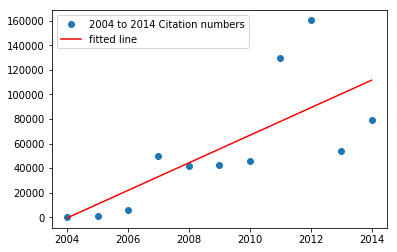

In [58]:
plt.plot(x, y, 'o', label='2004 to 2014 Citation numbers')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

### 4. Looking only at vehicles that have open penalty fees, what dollar amount is the 81st percentile of that group?

In [62]:
Baltimore_Parking_Data['OpenPenalty'].value_counts()

0.0       3165186
300.0       51371
325.0       19971
500.0       19671
525.0        9220
32.0         8489
64.0         8267
25.0         8105
16.0         7169
48.0         4258
96.0         3849
80.0         3757
144.0        3173
224.0        3153
112.0        3082
176.0        3045
256.0        2713
192.0        2390
128.0        2371
160.0        2357
240.0        2175
208.0        2131
288.0        2062
272.0        1961
750.0        1593
313.0         931
775.0         917
297.0         915
320.0         885
249.0         814
           ...   
1027.0          1
1029.0          1
1424.0          1
1410.0          1
1036.0          1
1408.0          1
1042.0          1
1406.0          1
994.0           1
1520.0          1
930.0           1
986.0           1
933.0           1
936.0           1
1632.0          1
940.0           1
1616.0          1
946.0           1
950.0           1
1604.0          1
958.0           1
964.0           1
1577.0          1
974.0           1
975.0     

In [66]:
OpenPenalty_data = Baltimore_Parking_Data.filter(['OpenPenalty'],axis = 1)
OpenPenalty_data_no_null = OpenPenalty_data[OpenPenalty_data['OpenPenalty'] != 0]
OpenPenalty_data_no_null.head()

,OpenPenalty
18,300.0
30,300.0
31,300.0
32,300.0
33,300.0


In [73]:
OpenPenalty_data_no_null.describe()

,OpenPenalty
count,209462.000000
mean,284.937106
std,182.987363
min,1.000000
25%,144.000000
50%,300.000000
75%,325.000000
max,3120.000000


In [173]:
per_81 = np.percentile(OpenPenalty_data_no_null['OpenPenalty'].values,81)
print('81st percentile of Open Penalty is',round(per_81,9))

81st percentile of Open Penalty is 480.0


### 5. Find the ten vehicle makes that received the most citations during 2017. For those top ten, find all Japanese-made vehicles. What proportion of all citations were written for those vehicles? Note that the naming in Make is not consistent over the whole dataset, so you will need to clean the data before calculating your answer. Your answer should be expressed as a decimal number (i.e. 0.42, not 42).

In [109]:
BDP_Citation_2017 = Baltimore_Parking_Data[Baltimore_Parking_Data['Year'] == 2017]
BDP_Citation_2017.head()

,Citation,Tag,ExpMM,ExpYY,State,Make,Address,ViolCode,Description,ViolFine,...,PenaltyDate,OpenFine,OpenPenalty,NoticeDate,ImportDate,Neighborhood,PoliceDistrict,CouncilDistrict,Location,Year
632,50013862,7AC9218,01,19,MD,TOYT,E North AVE WB @ N Howard St,30,Red Light Violation,75.0,...,NaN,0.0,0.0,NaN,09/20/2017 04:03:00 AM,NaN,NaN,NaN,"E N North AVE WB\nBaltimore, MD",2017
677,50097410,2EYW11,04,19,MD,HOND,Loch Raven Blvd NB @ E Belvede,30,Red Light Violation,75.0,...,NaN,0.0,0.0,NaN,10/21/2017 04:02:00 AM,NaN,NaN,NaN,"E Loch Raven Blvd NB\nBaltimore, MD",2017
699,50129379,LB0393,00,0,MD,MERZ,Loch Raven Blvd SB @ E Belvede,30,Red Light Violation,75.0,...,NaN,0.0,0.0,NaN,10/31/2017 04:02:00 AM,NaN,NaN,NaN,"E Loch Raven Blvd SB\nBaltimore, MD",2017
704,50131359,5BP5889,00,0,MD,FORD,Pulaski Hwy EB @ N North Point,30,Red Light Violation,75.0,...,NaN,0.0,0.0,NaN,10/31/2017 04:02:00 AM,NaN,NaN,NaN,"N Pulaski Hwy EB\nBaltimore, MD",2017
727,50151134,3CY2133,00,0,MD,NISS,Pulaski Hwy EB @ Moravia Park,30,Red Light Violation,75.0,...,NaN,0.0,0.0,NaN,11/03/2017 04:02:00 AM,NaN,NaN,NaN,"Pulaski Hwy EB\nBaltimore, MD",2017


In [111]:
# Fuzzy Match: Clean the Car Make Name, Short to three chats, then groupby
BDP_Citation_2017['Make'] = BDP_Citation_2017['Make'].str[0:3]
BDP_Citation_2017.head()

/Users/my_macbook/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Citation,Tag,ExpMM,ExpYY,State,Make,Address,ViolCode,Description,ViolFine,...,PenaltyDate,OpenFine,OpenPenalty,NoticeDate,ImportDate,Neighborhood,PoliceDistrict,CouncilDistrict,Location,Year
632,50013862,7AC9218,01,19,MD,TOY,E North AVE WB @ N Howard St,30,Red Light Violation,75.0,...,NaN,0.0,0.0,NaN,09/20/2017 04:03:00 AM,NaN,NaN,NaN,"E N North AVE WB\nBaltimore, MD",2017
677,50097410,2EYW11,04,19,MD,HON,Loch Raven Blvd NB @ E Belvede,30,Red Light Violation,75.0,...,NaN,0.0,0.0,NaN,10/21/2017 04:02:00 AM,NaN,NaN,NaN,"E Loch Raven Blvd NB\nBaltimore, MD",2017
699,50129379,LB0393,00,0,MD,MER,Loch Raven Blvd SB @ E Belvede,30,Red Light Violation,75.0,...,NaN,0.0,0.0,NaN,10/31/2017 04:02:00 AM,NaN,NaN,NaN,"E Loch Raven Blvd SB\nBaltimore, MD",2017
704,50131359,5BP5889,00,0,MD,FOR,Pulaski Hwy EB @ N North Point,30,Red Light Violation,75.0,...,NaN,0.0,0.0,NaN,10/31/2017 04:02:00 AM,NaN,NaN,NaN,"N Pulaski Hwy EB\nBaltimore, MD",2017
727,50151134,3CY2133,00,0,MD,NIS,Pulaski Hwy EB @ Moravia Park,30,Red Light Violation,75.0,...,NaN,0.0,0.0,NaN,11/03/2017 04:02:00 AM,NaN,NaN,NaN,"Pulaski Hwy EB\nBaltimore, MD",2017


In [112]:
BDP_Citation_2017_CarMaker = BDP_Citation_2017.groupby('Make', as_index=False)['Citation'].count()

In [114]:
BDP_Citation_2017_CarMaker.sort_values(by=['Citation'],inplace=True,ascending=False)
BDP_Citation_2017_CarMaker.head(10)

,Make,Citation
127,HON,70587
271,TOY,68724
101,FOR,56898
203,NIS,50108
58,CHE,49534
131,HYU,28113
74,DOD,21311
296,VOL,19836
26,ACU,17369
145,JEE,17025


In [115]:
total_citation = len(BDP_Citation_2017['Citation']) 
total_citation

553981

In [124]:
# Japanese Car Maker: HON-HONDA,TOY-TOYOTA,NIS-NISSAN,ACU-ACURA
Jap_Citation = BDP_Citation_2017_CarMaker.loc[(BDP_Citation_2017_CarMaker['Make'] == 'HON') |\
                                                (BDP_Citation_2017_CarMaker['Make'] == 'TOY') |\
                                                (BDP_Citation_2017_CarMaker['Make'] == 'NIS') |\
                                                (BDP_Citation_2017_CarMaker['Make'] == 'ACU') ]
Jap_Citation

,Make,Citation
127,HON,70587
271,TOY,68724
203,NIS,50108
26,ACU,17369


In [126]:
Jap_Citation_num = sum(Jap_Citation['Citation'].tolist())
Jap_Citation_num

206788

In [167]:
print('all Japanese-made vehicles proportion:',round(Jap_Citation_num/total_citation,9) )

all Japanese-made vehicles proportion: 0.37327634


### 6. To answer this last question, you will need to download another dataset: The Baltimore Police Department Victim Based Crime Dataset. (CSV file is available [here](https://data.baltimorecity.gov/api/views/wsfq-mvij/rows.csv).) First, determine how many instances of auto theft ocurred in each police district during 2015. Next, determine the number of parking citations that were issued in each police district during the same year. Finally, determine the ratio of auto thefts to parking citations for each district. Out of the nine police districts, what was the highest ratio?

In [129]:
Baltimore_Crime_Data = pd.read_csv('./Dataset/BPD_Part_1_Victim_Based_Crime_Data.csv')
Baltimore_Crime_Data.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,vri_name1,Total Incidents
0,07/20/2019,00:12:00,4A,1800 ORLEANS ST,AGG. ASSAULT,O,FIREARM,321.0,EASTERN,DUNBAR,-76.591305,39.295327,NaN,STREET,NaN,1
1,07/20/2019,02:00:00,3AF,700 N LINWOOD AVE,ROBBERY - STREET,O,FIREARM,323.0,EASTERN,MADISON EASTEND,-76.576691,39.299120,NaN,STREET,NaN,1
2,07/20/2019,23:33:00,5A,3100 BARCLAY ST,BURGLARY,I,NaN,513.0,NORTHERN,ABELL,-76.611089,39.326153,NaN,ROW/TOWNHOUSE-OCC,NaN,1
3,07/20/2019,15:50:00,6G,1000 W 36TH ST,LARCENY,I,NaN,531.0,NORTHERN,HAMPDEN,-76.633474,39.330852,NaN,OTHER - INSIDE,NaN,1
4,07/20/2019,19:00:00,6E,800 GILRUBIN CT,LARCENY,I,NaN,542.0,NORTHERN,PEN LUCY,-76.603411,39.341794,NaN,APT/CONDO - OCCUPIED,NaN,1


In [134]:
Baltimore_Crime_Data['Year'] = pd.DatetimeIndex(Baltimore_Crime_Data['CrimeDate']).year
Baltimore_Crime_Data.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,vri_name1,Total Incidents,Year
0,07/20/2019,00:12:00,4A,1800 ORLEANS ST,AGG. ASSAULT,O,FIREARM,321.0,EASTERN,DUNBAR,-76.591305,39.295327,NaN,STREET,NaN,1,2019
1,07/20/2019,02:00:00,3AF,700 N LINWOOD AVE,ROBBERY - STREET,O,FIREARM,323.0,EASTERN,MADISON EASTEND,-76.576691,39.299120,NaN,STREET,NaN,1,2019
2,07/20/2019,23:33:00,5A,3100 BARCLAY ST,BURGLARY,I,NaN,513.0,NORTHERN,ABELL,-76.611089,39.326153,NaN,ROW/TOWNHOUSE-OCC,NaN,1,2019
3,07/20/2019,15:50:00,6G,1000 W 36TH ST,LARCENY,I,NaN,531.0,NORTHERN,HAMPDEN,-76.633474,39.330852,NaN,OTHER - INSIDE,NaN,1,2019
4,07/20/2019,19:00:00,6E,800 GILRUBIN CT,LARCENY,I,NaN,542.0,NORTHERN,PEN LUCY,-76.603411,39.341794,NaN,APT/CONDO - OCCUPIED,NaN,1,2019


In [131]:
Baltimore_Crime_Data['District'].value_counts()

NORTHEAST    40244
SOUTHEAST    39309
SOUTHERN     30354
CENTRAL      30094
NORTHERN     29383
SOUTHWEST    27300
NORTHWEST    25624
EASTERN      23325
WESTERN      21438
UNKNOWN         75
Name: District, dtype: int64

In [132]:
Baltimore_Crime_Data['Description'].value_counts()

LARCENY                 59664
COMMON ASSAULT          43599
BURGLARY                39238
LARCENY FROM AUTO       35636
AGG. ASSAULT            28619
AUTO THEFT              23771
ROBBERY - STREET        18823
ROBBERY - COMMERCIAL     4789
SHOOTING                 3463
ROBBERY - RESIDENCE      2703
ROBBERY - CARJACKING     2183
RAPE                     1738
HOMICIDE                 1707
ARSON                    1213
Name: Description, dtype: int64

In [135]:
# 2015 Data
Baltimore_Crime_2015_Data = Baltimore_Crime_Data[Baltimore_Crime_Data['Year'] == 2015]
Baltimore_Crime_2015_Data.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,vri_name1,Total Incidents,Year
173573,12/31/2015,18:53:00,6D,2900 OAKFORD AVE,LARCENY FROM AUTO,I,NaN,532.0,NORTHERN,PARKLANE,-76.663271,39.341466,NaN,UNKNOWN,NaN,1,2015
173574,12/31/2015,09:15:00,6G,4200 PENNINGTON AVE,LARCENY,I,NaN,911.0,SOUTHERN,CURTIS BAY,-76.588635,39.227551,NaN,OTHER - INSIDE,NaN,1,2015
173575,12/31/2015,01:45:00,3AF,4700 MORAVIA RD,ROBBERY - STREET,O,FIREARM,443.0,NORTHEAST,FRANKFORD,-76.552125,39.326226,NaN,STREET,NaN,1,2015
173576,12/31/2015,20:00:00,3AF,5600 NORTHWOOD AVE,ROBBERY - STREET,O,FIREARM,523.0,NORTHERN,CAMERON VILLAGE,-76.597971,39.357816,NaN,STREET,NaN,1,2015
173577,12/31/2015,14:00:00,7A,2100 W LAFAYETTE AVE,AUTO THEFT,O,NaN,722.0,WESTERN,MIDTOWN EDMONDSON,-76.651014,39.298589,NaN,STREET,NaN,1,2015


In [136]:
Auto_Theft_2015_Data = Baltimore_Crime_2015_Data[Baltimore_Crime_2015_Data['Description'] == 'AUTO THEFT']
Auto_Theft_2015_Data.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,vri_name1,Total Incidents,Year
173577,12/31/2015,14:00:00,7A,2100 W LAFAYETTE AVE,AUTO THEFT,O,NaN,722.0,WESTERN,MIDTOWN EDMONDSON,-76.651014,39.298589,NaN,STREET,NaN,1,2015
173596,12/31/2015,02:30:00,7A,1000 TYSON ST,AUTO THEFT,O,NaN,141.0,CENTRAL,MID-TOWN BELVEDERE,-76.618643,39.301505,NaN,STREET,NaN,1,2015
173617,12/31/2015,15:30:00,7A,5200 HILLWELL RD,AUTO THEFT,O,NaN,823.0,SOUTHWEST,WESTGATE,-76.702714,39.281864,NaN,STREET,NaN,1,2015
173631,12/31/2015,15:45:00,7A,3300 BLOOMINGDALE RD,AUTO THEFT,O,NaN,811.0,SOUTHWEST,WALBROOK,-76.672808,39.310713,NaN,STREET,NaN,1,2015
173641,12/31/2015,14:45:00,7A,4400 WILLSHIRE AVE,AUTO THEFT,O,NaN,444.0,NORTHEAST,FRANKFORD,-76.546781,39.337122,NaN,PARKING LOT-OUTSIDE,NaN,1,2015


####  6.1 how many instances of auto theft ocurred in each police district during 2015.

In [148]:
Auto_Theft_2015_District = Auto_Theft_2015_Data.groupby('District', as_index=False)['Description'].count()
Auto_Theft_2015_District

,District,Description
0,CENTRAL,294
1,EASTERN,336
2,NORTHEAST,821
3,NORTHERN,498
4,NORTHWEST,567
5,SOUTHEAST,494
6,SOUTHERN,453
7,SOUTHWEST,557
8,UNKNOWN,3
9,WESTERN,542


In [149]:
Auto_Theft_2015_District = Auto_Theft_2015_District[Auto_Theft_2015_District['District'] != 'UNKNOWN']
Auto_Theft_2015_District

,District,Description
0,CENTRAL,294
1,EASTERN,336
2,NORTHEAST,821
3,NORTHERN,498
4,NORTHWEST,567
5,SOUTHEAST,494
6,SOUTHERN,453
7,SOUTHWEST,557
9,WESTERN,542


In [151]:
Auto_Theft_2015_District.columns = ['PoliceDistrict','Number of AutoTheft']
Auto_Theft_2015_District

,PoliceDistrict,Number of AutoTheft
0,CENTRAL,294
1,EASTERN,336
2,NORTHEAST,821
3,NORTHERN,498
4,NORTHWEST,567
5,SOUTHEAST,494
6,SOUTHERN,453
7,SOUTHWEST,557
9,WESTERN,542


#### 6.2 determine the number of parking citations that were issued in each police district during the same year.

In [140]:
BDP_Citation_2015 = Baltimore_Parking_Data[Baltimore_Parking_Data['Year'] == 2015]


In [141]:
BDP_Citation_2015['PoliceDistrict'].value_counts()

southeastern    14981
southern        12422
central         11852
northern         9586
northeastern     4111
eastern          3125
southwestern     2610
western          2481
northwestern     1731
Name: PoliceDistrict, dtype: int64

In [153]:
BDP_Citation_2015_District = BDP_Citation_2015.groupby('PoliceDistrict', as_index=False)['Citation'].count()
BDP_Citation_2015_District

,PoliceDistrict,Citation
0,central,11852
1,eastern,3125
2,northeastern,4111
3,northern,9586
4,northwestern,1731
5,southeastern,14981
6,southern,12422
7,southwestern,2610
8,western,2481


In [155]:
BDP_Citation_2015_District['PoliceDistrict'] = BDP_Citation_2015_District['PoliceDistrict'].str.upper()
BDP_Citation_2015_District

,PoliceDistrict,Citation
0,CENTRAL,11852
1,EASTERN,3125
2,NORTHEASTERN,4111
3,NORTHERN,9586
4,NORTHWESTERN,1731
5,SOUTHEASTERN,14981
6,SOUTHERN,12422
7,SOUTHWESTERN,2610
8,WESTERN,2481


#### 6.3 determine the ratio of auto thefts to parking citations for each district

In [158]:
Auto_Theft_2015_District

,PoliceDistrict,Number of AutoTheft
0,CENTRAL,294
1,EASTERN,336
2,NORTHEAST,821
3,NORTHERN,498
4,NORTHWEST,567
5,SOUTHEAST,494
6,SOUTHERN,453
7,SOUTHWEST,557
9,WESTERN,542


In [159]:
# Match the Police District Name REPLACE Northeast with Northeastern etc..
Auto_Theft_2015_District['PoliceDistrict'] = Auto_Theft_2015_District['PoliceDistrict'].str.replace('NORTHEAST','NORTHEASTERN')

Auto_Theft_2015_District['PoliceDistrict'] = Auto_Theft_2015_District['PoliceDistrict'].str.replace('NORTHWEST','NORTHWESTERN')

Auto_Theft_2015_District['PoliceDistrict'] = Auto_Theft_2015_District['PoliceDistrict'].str.replace('SOUTHEAST','SOUTHEASTERN')

Auto_Theft_2015_District['PoliceDistrict'] = Auto_Theft_2015_District['PoliceDistrict'].str.replace('SOUTHWEST','SOUTHWESTERN')

Auto_Theft_2015_District

/Users/my_macbook/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/my_macbook/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/my_macbook/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

,PoliceDistrict,Number of AutoTheft
0,CENTRAL,294
1,EASTERN,336
2,NORTHEASTERN,821
3,NORTHERN,498
4,NORTHWESTERN,567
5,SOUTHEASTERN,494
6,SOUTHERN,453
7,SOUTHWESTERN,557
9,WESTERN,542


In [161]:
ratio_data = pd.merge(Auto_Theft_2015_District,BDP_Citation_2015_District, on = 'PoliceDistrict')
ratio_data

,PoliceDistrict,Number of AutoTheft,Citation
0,CENTRAL,294,11852
1,EASTERN,336,3125
2,NORTHEASTERN,821,4111
3,NORTHERN,498,9586
4,NORTHWESTERN,567,1731
5,SOUTHEASTERN,494,14981
6,SOUTHERN,453,12422
7,SOUTHWESTERN,557,2610
8,WESTERN,542,2481


In [162]:
ratio_data['ratio'] = ratio_data['Number of AutoTheft']/ratio_data['Citation']

In [165]:
ratio_data.sort_values(by=['ratio'],ascending= False, inplace = True)
ratio_data

,PoliceDistrict,Number of AutoTheft,Citation,ratio
4,NORTHWESTERN,567,1731,0.327556
8,WESTERN,542,2481,0.218460
7,SOUTHWESTERN,557,2610,0.213410
2,NORTHEASTERN,821,4111,0.199708
1,EASTERN,336,3125,0.107520
3,NORTHERN,498,9586,0.051951
6,SOUTHERN,453,12422,0.036468
5,SOUTHEASTERN,494,14981,0.032975
0,CENTRAL,294,11852,0.024806


In [166]:
Highest_ratio = ratio_data['ratio'].tolist()[0]
print('The highest ratio: ', round(Highest_ratio,9))

The highest ratio:  0.327556326
